<a href="https://colab.research.google.com/github/nateassefa/superheroAssignment/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

# **Initialize Database**

In [16]:
import sqlite3
import os

# Connect to database
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

print("Database initialized.")




Database initialized.


# **Create Tables**

In [17]:
# Create Heroes table with autoincremented primary key, unique name, power, and team

cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT UNIQUE NOT NULL,
  power TEXT NOT NULL,
  team TEXT NOT NULL
  );
  '''
)

# Create Villains Table with autoincremented primary key, unique name, power, and team


cursor.execute('''
CREATE TABLE IF NOT EXISTS villians(
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT UNIQUE NOT NULL,
  evil_plan TEXT NOT NULL
);
''')

# Create Battles table with autoincremented primary key, hello and villain id,
# outcome and foreign keys referring to hero and villain ids

cursor.execute('''
CREATE TABLE IF NOT EXISTS battles(
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  hero_id INTEGER NOT NULL,
  villain_id INTEGER NOT NULL,
  outcome TEXT NOT NULL,
  FOREIGN KEY (hero_id) REFERENCES heroes(id),
  FOREIGN KEY (villain_id) REFERENCES villains(id)
  );
  '''
)

conn.commit()

print("Tables have been created successfully.")


Tables have been created successfully.


In [18]:
import pandas as pd

# read CSV into pandas
heroes_df = pd.read_csv("heroes.csv")
villains_df = pd.read_csv("villains.csv")
battles_df = pd.read_csv("battles.csv")

In [19]:
# Insert heroes into SQLite
heroes_df.to_sql("heroes", conn, if_exists="replace", index=False)

# Insert villains into SQLite
villains_df.to_sql("villains", conn, if_exists="replace", index=False)

# Debug message
print("Heroes data inserted successfully.")
print("Villains data inserted")

Heroes data inserted successfully.
Villains data inserted


In [20]:
# Insert battles into SQLite
for index, row in battles_df.iterrows():
  cursor.execute("INSERT INTO battles (hero_id, villain_id, outcome) VALUES (?, ?, ?)",
                   (row["hero_id"], row["villain_id"], row["outcome"]))

conn.commit()
print("Battles data inserted successfully.")

Battles data inserted successfully.


# **Fetch Data and Insert into SQLite**

In [21]:
cursor.execute("SELECT * FROM heroes LIMIT 5")
heroes = cursor.fetchall()
print(heroes)

cursor.execute("SELECT * FROM villains LIMIT 5")
villains = cursor.fetchall()
print(villains)

cursor.execute("SELECT * FROM battles LIMIT 5")
battles = cursor.fetchall()
print(battles)

[(1, 'Spider-Man', 'Web-slinging', 'Avengers'), (2, 'Iron Man', 'Powered Armor', 'Avengers'), (3, 'Batman', 'Genius Detective', 'Justice League'), (4, 'Superman', 'Super Strength', 'Justice League'), (5, 'Thor', 'God of Thunder', 'Avengers')]
[(1, 'Green Goblin', 'Terrorize New York'), (2, 'Thanos', 'Collect all Infinity Stones'), (3, 'Joker', 'Spread chaos in Gotham'), (4, 'Lex Luthor', 'Defeat Superman'), (5, 'Loki', 'Trick humanity into worshiping him')]
[(1, 1, 10, 'Villain Wins'), (2, 9, 3, 'Hero Wins'), (3, 8, 1, 'Draw'), (4, 5, 4, 'Villain Wins'), (5, 1, 7, 'Hero Wins')]


In [22]:
# Insert into SQLite
heroes_df.to_sql("heroes", conn, if_exists="replace", index=False)
villains_df.to_sql("villains", conn, if_exists="replace", index=False)

# Battles Foreign Keys
for index, row in battles_df.iterrows():
  cursor.execute("INSERT INTO battles (hero_id, villain_id, outcome) VALUES (?, ?, ?)",
                   (row["hero_id"], row["villain_id"], row["outcome"]))

conn.commit()
print("Data imported.")

Data imported.


# **Retreiving Data to Answer Questions**

In [23]:
# Retreive each superhero's powers

cursor.execute("SELECT name, power FROM heroes")
print(cursor.fetchall())

[('Spider-Man', 'Web-slinging'), ('Iron Man', 'Powered Armor'), ('Batman', 'Genius Detective'), ('Superman', 'Super Strength'), ('Thor', 'God of Thunder'), ('Wonder Woman', 'Amazonian Strength'), ('Black Panther', 'Enhanced Agility'), ('The Flash', 'Super Speed'), ('Hulk', 'Super Strength'), ('Doctor Strange', 'Mystic Arts')]


In [24]:
# Retreive all the battles that the hero won
cursor.execute("""
SELECT h.name, v.name, b.outcome
FROM battles b
JOIN heroes h ON b.hero_id = h.id
JOIN villains v ON b.villain_id = v.id
WHERE b.outcome = 'Hero Wins'
""")

# Print results
print(cursor.fetchall())

[('Hulk', 'Joker', 'Hero Wins'), ('Spider-Man', 'Darkseid', 'Hero Wins'), ('Hulk', 'Venom', 'Hero Wins'), ('Batman', 'Thanos', 'Hero Wins'), ('Black Panther', 'Loki', 'Hero Wins'), ('The Flash', 'Magneto', 'Hero Wins'), ('Batman', 'Lex Luthor', 'Hero Wins'), ('Batman', 'Loki', 'Hero Wins'), ('Thor', 'Loki', 'Hero Wins'), ('Hulk', 'Joker', 'Hero Wins'), ('Spider-Man', 'Darkseid', 'Hero Wins'), ('Hulk', 'Venom', 'Hero Wins'), ('Batman', 'Thanos', 'Hero Wins'), ('Black Panther', 'Loki', 'Hero Wins'), ('The Flash', 'Magneto', 'Hero Wins'), ('Batman', 'Lex Luthor', 'Hero Wins'), ('Batman', 'Loki', 'Hero Wins'), ('Thor', 'Loki', 'Hero Wins'), ('Hulk', 'Joker', 'Hero Wins'), ('Spider-Man', 'Darkseid', 'Hero Wins'), ('Hulk', 'Venom', 'Hero Wins'), ('Batman', 'Thanos', 'Hero Wins'), ('Black Panther', 'Loki', 'Hero Wins'), ('The Flash', 'Magneto', 'Hero Wins'), ('Batman', 'Lex Luthor', 'Hero Wins'), ('Batman', 'Loki', 'Hero Wins'), ('Thor', 'Loki', 'Hero Wins'), ('Hulk', 'Joker', 'Hero Wins'), (

In [25]:
# Retreive the villains and their plans
cursor.execute("SELECT name, evil_plan FROM villains")
print(cursor.fetchall())

[('Green Goblin', 'Terrorize New York'), ('Thanos', 'Collect all Infinity Stones'), ('Joker', 'Spread chaos in Gotham'), ('Lex Luthor', 'Defeat Superman'), ('Loki', 'Trick humanity into worshiping him'), ('Ultron', 'AI world domination'), ('Darkseid', 'Control the universe'), ('Venom', 'Consume Spider-Man'), ('Magneto', 'Mutant supremacy'), ('Red Skull', 'Revive Hydra')]


In [26]:
# Find the hero who fought the most
cursor.execute("""
SELECT h.name, COUNT(*) AS num_battles
FROM battles b
JOIN heroes h ON b.hero_id = h.id
GROUP BY h.name
ORDER BY num_battles DESC
LIMIT 1
""")

print(cursor.fetchall())

[('Batman', 28)]


# **Custom Sidekicks Feature**

In [27]:
# Create table to hold the sidekicks for each superhero

cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  hero_id INTEGER NOT NULL,
  sidekick_name TEXT NOT NULL,
  FOREIGN KEY (hero_id) REFERENCES heroes(id)
);
''')

conn.commit()
print("Sidekicks table has been created.")

Sidekicks table has been created.


In [28]:
# Insert the sidekicks
cursor.execute("INSERT INTO sidekicks(hero_id, sidekick_name) VALUES ((SELECT id FROM heroes WHERE name = 'Batman'), 'Robin')")
cursor.execute("INSERT INTO sidekicks(hero_id, sidekick_name) VALUES ((SELECT id FROM heroes WHERE name = 'Superman'), 'Superboy')")

conn.commit()
print("Sidekicks have been inserted.")

Sidekicks have been inserted.


In [29]:
# Display superheroes and their sidekick
cursor.execute ("""
SELECT h.name, s.sidekick_name
FROM sidekicks s
JOIN heroes h ON s.hero_id = h.id
""")

print(cursor.fetchall())

[('Batman', 'Robin'), ('Superman', 'Superboy')]


# **Bonus Visualization**

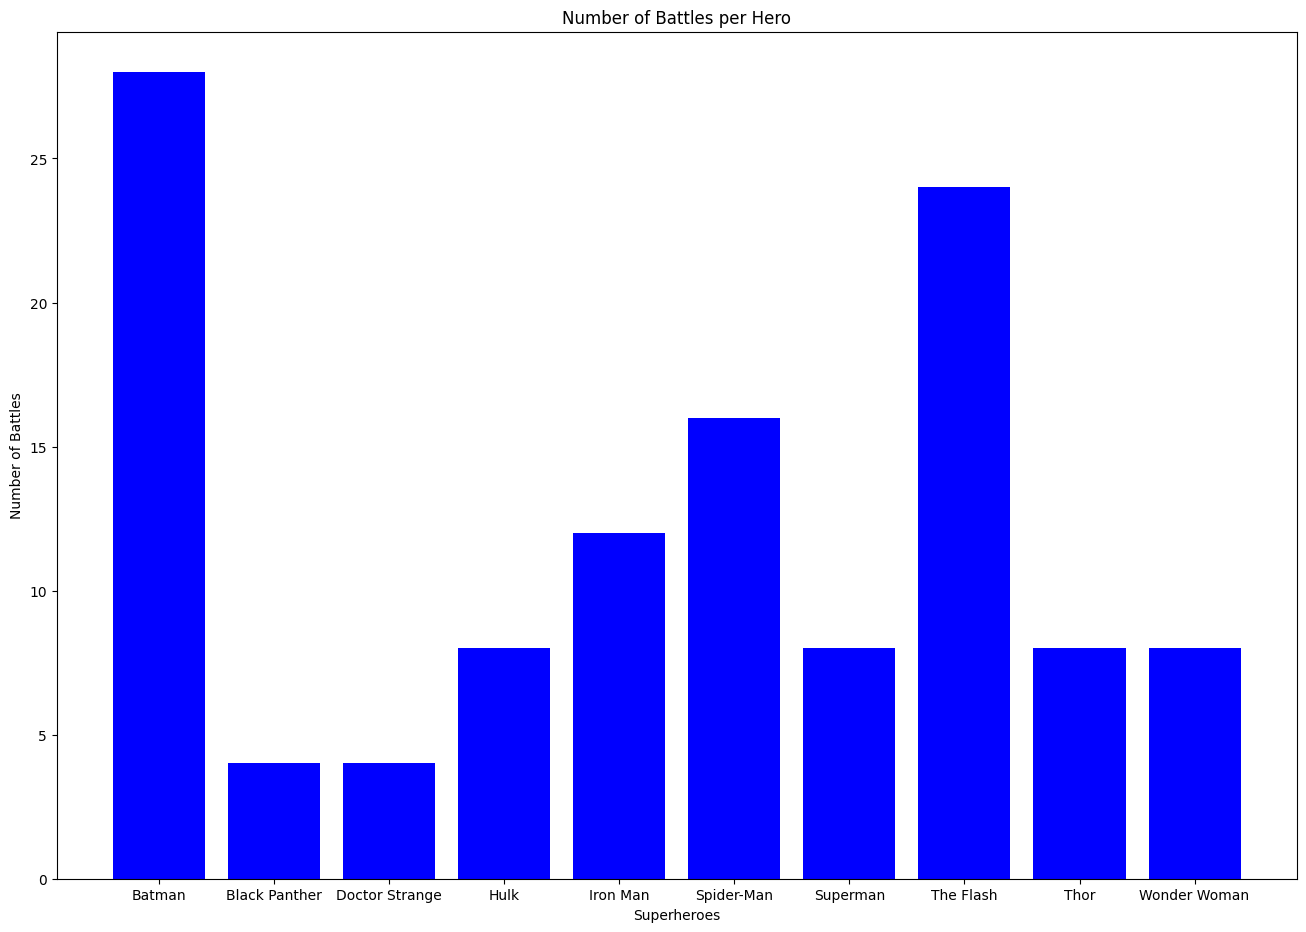

In [30]:
# Import matplot lib to prepare visualization
import matplotlib.pyplot as plt

# Retreive SQLite data
cursor.execute("SELECT h.name, COUNT(*) FROM battles b JOIN heroes h ON b.hero_id = h.id GROUP BY h.name")
data = cursor.fetchall()

# Retreive the heroes and battle counts
heroes = [row[0] for row in data]
battle_counts = [row[1] for row in data]

# Format the visulization to be easier to see
plt.figure(figsize=(16, 11))

# Plot labels, title, and show visuzliat
plt.bar(heroes, battle_counts, color = 'blue')
plt.xlabel('Superheroes')
plt.ylabel('Number of Battles')
plt.title('Number of Battles per Hero')
plt.show()


In [31]:
# Close the connection
conn.close()
print("Database connection closed.")

Database connection closed.


# **Instructions**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!